# Part 3.1

# Import Libraries and datas

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
from datetime import datetime
from packaging import version
import pandas as pd
import tensorflow as tf
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Plot the number of each train and test data  according to the classes

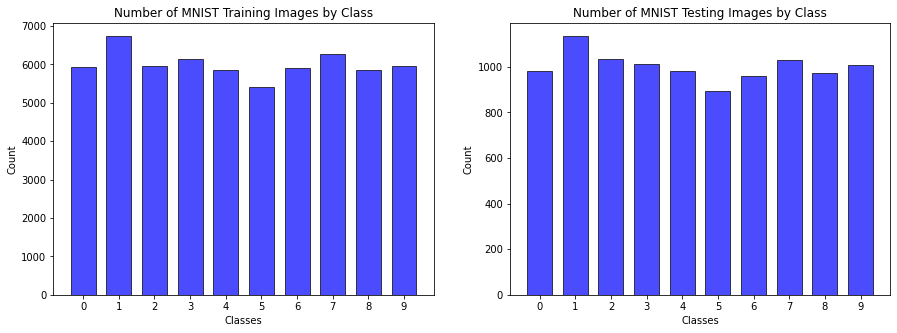

In [38]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
colors = ['blue']
axs[0].hist(train_labels,bins=np.arange(11)-0.5 ,ec='black', align='mid', color=colors,alpha=0.7,rwidth=0.7)
axs[0].set_title('Number of MNIST Training Images by Class')
axs[0].set_xlabel('Classes') 
axs[0].set_ylabel('Count')
axs[1].hist(test_labels,bins=np.arange(11)-0.5 , ec='black', align='mid', color=colors,alpha=0.7,rwidth=0.7)
axs[1].set_title('Number of MNIST Testing Images by Class')
axs[1].set_xlabel('Classes') 
axs[1].set_ylabel('Count')
axs[0].set_xticks(np.arange(10))
axs[1].set_xticks(np.arange(10))
plt.show()

# Plot 5 random data of our dataset

[57240, 36094, 27905, 22712, 46576]


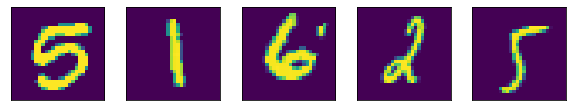

In [62]:
import random
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))

rand_list=[]
for i in range(5):
    rand_list.append(random.randint(0,60000))
print(rand_list)

j=0
for i in rand_list:
  plt.subplot(5,5,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  j=j+1
plt.show()

# Normalization

In [3]:
# Data normalization
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))#2D matrix (height x width) to a 1D vector (height x width x channels)
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
print (train_images.shape)
print (test_images.shape)

(60000, 784)
(10000, 784)


# Part 3.2
# Designing Auto-encoder model

In [4]:
input_size = 784
hidden_size1 = 500
hidden_size2=300
hidden_size3=100
latent_size = 30

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size1, activation='relu')(input_img)
hidden_2 = Dense(hidden_size2, activation='relu')(hidden_1)
hidden_3 = Dense(hidden_size3, activation='relu')(hidden_2)
latent = Dense(latent_size, activation='relu')(hidden_3)
encoder = Model(input_img, latent)
hidden_4 = Dense(hidden_size3, activation='sigmoid')(latent)
hidden_5 = Dense(hidden_size2, activation='sigmoid')(hidden_4)
hidden_6 = Dense(hidden_size1, activation='sigmoid')(hidden_5)
output_img = Dense(input_size,activation='sigmoid')(hidden_6)
##The sigmoid activation function output values in the range [0, 1] which fits perfectly with our scaled image data.
decoder = Model(hidden_4, output_img)


autoencoder = Model(input_img, output_img)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 30)                3030      
                                                                 
 dense_4 (Dense)             (None, 100)               3100      
                                                                 
 dense_5 (Dense)             (None, 300)               3030

# Training the model

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(train_images, train_images,
                    epochs=100,
                    shuffle=True,
                    validation_data=(test_images, test_images))

Epoch 1/100
1875/1875 [==============================] - 69s 34ms/step - loss: 0.2111 - val_loss: 0.1743
Epoch 2/100
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1609 - val_loss: 0.1512
Epoch 3/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1427 - val_loss: 0.1339
Epoch 4/100
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1298 - val_loss: 0.1256
Epoch 5/100
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1219 - val_loss: 0.1176
Epoch 6/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1153 - val_loss: 0.1125
Epoch 7/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1106 - val_loss: 0.1080
Epoch 8/100
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1068 - val_loss: 0.1050
Epoch 9/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1036 - val_loss: 0.1023
Epoch 10/100
1875/1875 [==============================]

# Evaluate the Auto-encoder

In [6]:
encoded_imgs = autoencoder.predict(test_images)

313/313 [==============================] - 3s 8ms/step


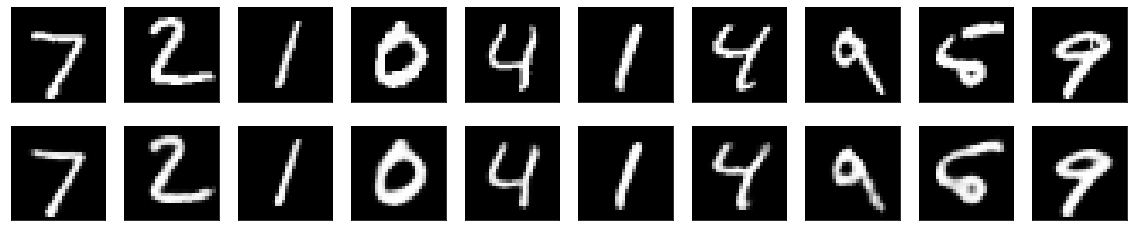

In [76]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original data
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot loss and val_loss

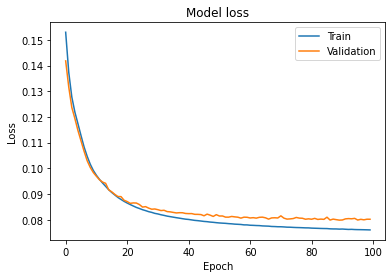

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Part 3.2

# Classification

output of the encoder as the input for the model

In [17]:
input_size = 784
hidden_size1 = 500
hidden_size2=300
hidden_size3=100
latent_size = 30

latent = Input(shape=(latent_size,))
den = Dense(30, activation='sigmoid')(latent)
den1 = Dense(30, activation='sigmoid')(den)
out = Dense(10, activation='softmax')(den1)

model = Model(latent, out)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_29 (Dense)            (None, 30)                930       
                                                                 
 dense_30 (Dense)            (None, 30)                930       
                                                                 
 dense_31 (Dense)            (None, 10)                310       
                                                                 
Total params: 2,170
Trainable params: 2,170
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Converting integer class labels into binary vectors using one-hot encoding

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

# Extract features from encoder and use them as input for our model

In [11]:
encoded_train = encoder.predict(train_images)
encoded_test = encoder.predict(test_images)

313/313 [==============================] - 1s 3ms/step


# Train the model and updates the model's weights 

In [19]:
history = model.fit(encoded_train, train_labels,
                    epochs=100,
                    validation_data=(encoded_test, test_labels))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8265 - accuracy: 0.8265 - val_loss: 0.2834 - val_accuracy: 0.9334
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2312 - accuracy: 0.9387 - val_loss: 0.1973 - val_accuracy: 0.9451
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1799 - accuracy: 0.9483 - val_loss: 0.1680 - val_accuracy: 0.9523
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1564 - accuracy: 0.9541 - val_loss: 0.1535 - val_accuracy: 0.9563
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9573 - val_loss: 0.1413 - val_accuracy: 0.9594
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1315 - accuracy: 0.9608 - val_loss: 0.1326 - val_accuracy: 0.9624
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9627 - val_loss: 0.1233 - val_ac

# Test loss and Test accuracy

In [23]:
score = model.evaluate(encoded_test, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08821100741624832
Test accuracy: 0.9742000102996826


# Plot loss , val_loss , accuracy and val_accuracy

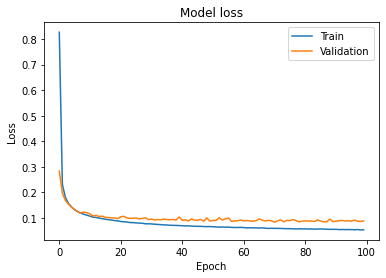

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

313/313 - 1s - loss: 0.0882 - accuracy: 0.9742 - 713ms/epoch - 2ms/step


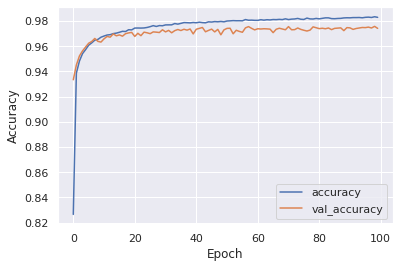

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(encoded_test,  test_labels, verbose=2)

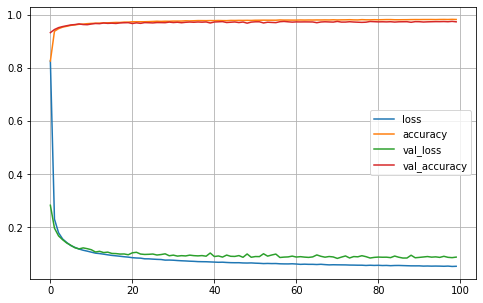

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

# Plot confusion matrix

In [27]:
y_pred = model.predict(encoded_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 

313/313 [==============================] - 1s 4ms/step


In [28]:
y_pred_classes1 = np.argmax(test_labels,axis = 1) 
y_pred_classes1

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
confusion_mtx = tf.math.confusion_matrix(y_pred_classes1, y_pred_classes)

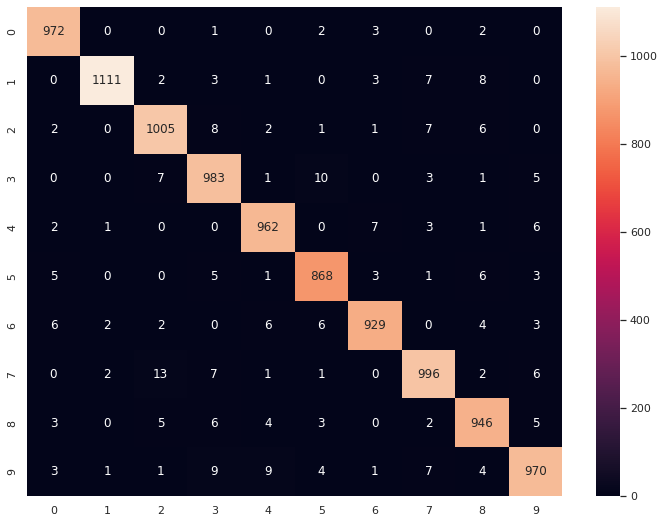

In [32]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')